In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
pd.options.display.max_rows = 500

In [20]:
day = -1
prices_filename = f"./round-2-island-data-bottle/prices_round_2_day_{day}.csv"
trade_filename = f"./round-2-island-data-bottle/prices_round_2_day_{day}.csv"
market_data = pd.read_csv(prices_filename, sep=';', header=0)
trade_history = pd.read_csv(trade_filename, sep=';', header=0)

In [21]:
market_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0
1,-1,0,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0
2,-1,0,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
3,-1,0,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0
4,-1,0,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,-1,999900,DJEMBES,13493,76,NaN,NaN,NaN,NaN,13494,76,NaN,NaN,NaN,NaN,13493.5,0.0
79996,-1,999900,KELP,2028,31,NaN,NaN,NaN,NaN,2030,6,2031.0,31.0,NaN,NaN,2029.0,0.0
79997,-1,999900,RAINFOREST_RESIN,9992,32,NaN,NaN,NaN,NaN,10008,32,NaN,NaN,NaN,NaN,10000.0,0.0
79998,-1,999900,PICNIC_BASKET1,59222,2,59221.0,13.0,59220.0,27.0,59231,2,59232.0,13.0,59233.0,27.0,59226.5,0.0


In [29]:
pic1_data = market_data[market_data['product'] == 'PICNIC_BASKET1'].reset_index(drop=True)
pic2_data = market_data[market_data['product'] == 'PICNIC_BASKET2'].reset_index(drop=True)
crois_data = market_data[market_data['product'] == 'CROISSANTS'].reset_index(drop=True)
jam_data = market_data[market_data['product'] == 'JAMS'].reset_index(drop=True)
djembe_data = market_data[market_data['product'] == 'DJEMBES'].reset_index(drop=True)
resin_data = market_data[market_data['product'] == 'RAINFOREST_RESIN'].reset_index(drop=True)
ink_data = market_data[market_data['product'] == 'SQUID_INK'].reset_index(drop=True)
kelp_data = market_data[market_data['product']== 'KELP'].reset_index(drop=True)

In [30]:
pic1_diff = pic1_data['mid_price'] - 6 * crois_data['mid_price'] - 3 * jam_data['mid_price'] - djembe_data['mid_price']
pic2_diff = pic2_data['mid_price'] - 4 * crois_data['mid_price'] - 2 * jam_data['mid_price']
timestamps = pic1_data['timestamp']

In [31]:
def plotDiff(diff_data, timestamps, name):
    plt.figure(figsize = (10, 6))
    plt.plot(timestamps, diff_data.values)

    line = np.linspace(0, timestamps.iloc[-1], 100)
    plt.plot(line, 0 * line)

    plt.xlabel("Time")
    plt.ylabel(f"Diff btwn {name} and its Constituents")
    plt.title(f"Plot of {name} Profitability")
    plt.tight_layout()
    plt.xlim([0, timestamps.iloc[-1]])
    plt.show()

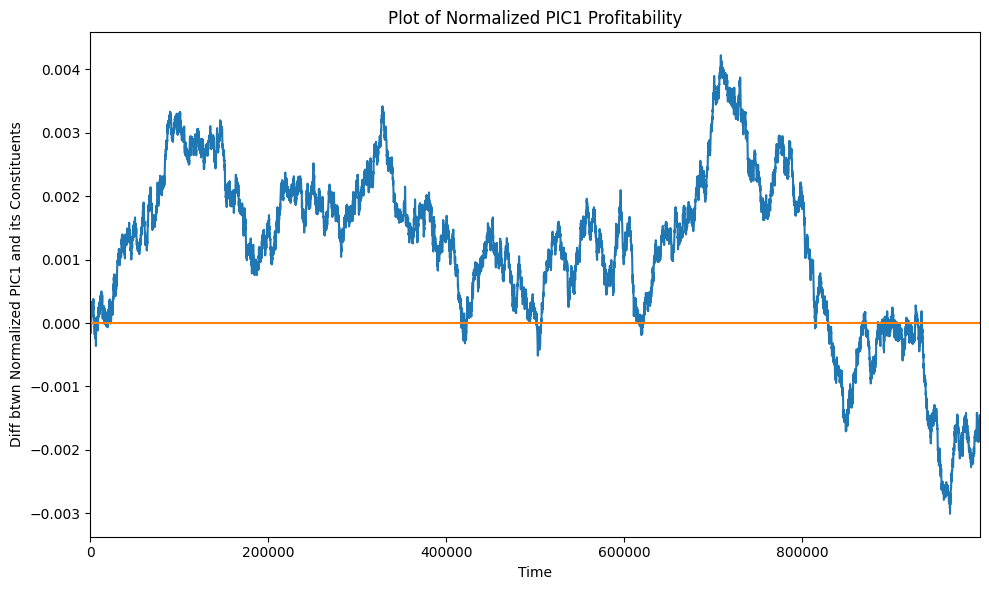

In [32]:
# plotting the normalized mid price difference btwn PICNIC_BASKET1 and its constituents
pic1_diff_normalized = pic1_diff.div(pic1_data['mid_price'])
plotDiff(pic1_diff_normalized, timestamps, "Normalized PIC1")

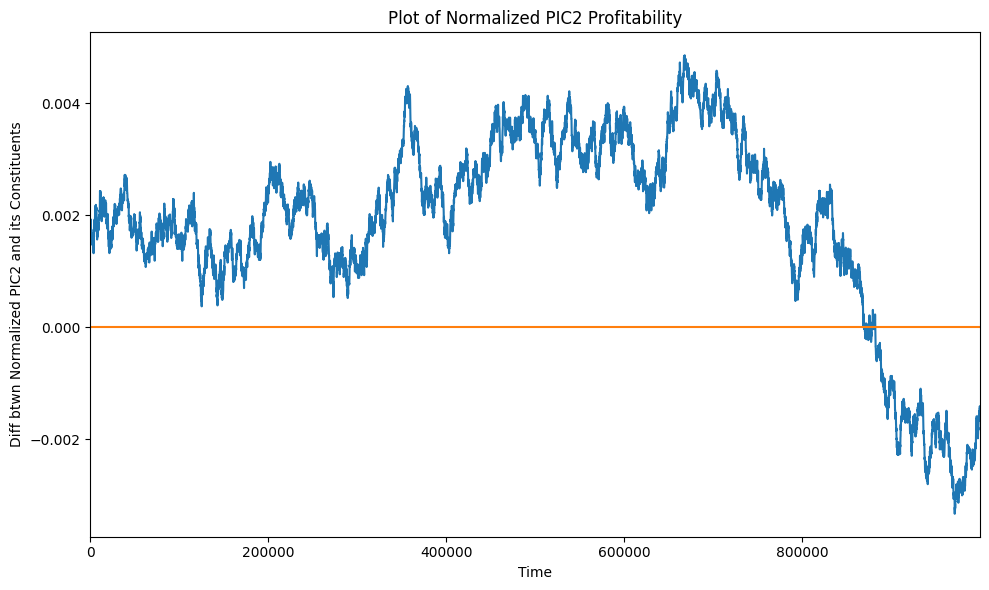

In [33]:
# plotting the normalized mid price difference btwn PICNIC_BASKET2 and its constituents
pic2_diff_normalized = pic2_diff.div(pic2_data['mid_price'])
plotDiff(pic2_diff_normalized, timestamps, "Normalized PIC2")

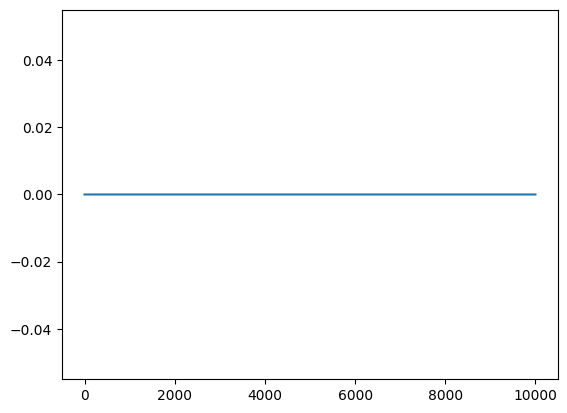

In [34]:
# checking if the mid price they provide is actually the midprice
max_bid_pic1 = pic1_data[['bid_price_1', 'bid_price_2', 'bid_price_3']].max(axis = 1)
min_ask_pic1 = pic1_data[['ask_price_1', 'ask_price_2', 'ask_price_3']].min(axis = 1)
mmid_pic1 = (max_bid_pic1 + min_ask_pic1) / 2
check = pic1_data['mid_price'] - mmid_pic1
plt.plot(check.index, check.values)
plt.show()

In [35]:
mid_prices = pd.DataFrame()
mid_prices['RAINFOREST_RESIN'] = resin_data['mid_price']
mid_prices['KELP'] = kelp_data['mid_price']
mid_prices['SQUID_INK'] = ink_data['mid_price']
mid_prices['PICNIC_BASKET1'] = pic1_data['mid_price']
mid_prices['PICNIC_BASKET2'] = pic2_data['mid_price']
mid_prices['CROISSANTS'] = crois_data['mid_price']
mid_prices['JAMS'] = jam_data['mid_price']
mid_prices['DJEMBES'] = djembe_data['mid_price']

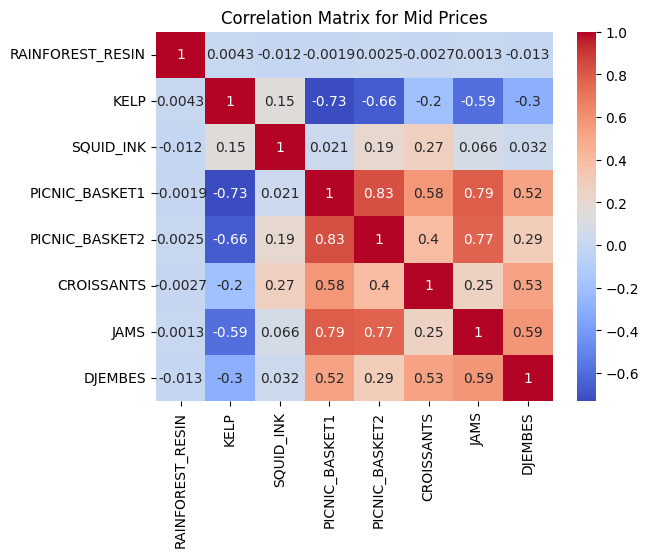

In [42]:
midprices_corr_matrix = mid_prices.corr()
sns.heatmap(midprices_corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Mid Prices")
plt.show()

In [45]:
returns = pd.DataFrame()
returns['RAINFOREST_RESIN'] = resin_data['mid_price'] / resin_data['mid_price'].shift() - 1
returns['KELP'] = kelp_data['mid_price'] / kelp_data['mid_price'].shift() - 1
returns['SQUID_INK'] = ink_data['mid_price'] / ink_data['mid_price'].shift() - 1
returns['PICNIC_BASKET1'] = pic1_data['mid_price'] / pic1_data['mid_price'].shift() - 1
returns['PICNIC_BASKET2'] = pic2_data['mid_price'] / pic2_data['mid_price'].shift() - 1
returns['CROISSANTS'] = crois_data['mid_price'] / crois_data['mid_price'].shift() - 1
returns['JAMS'] = jam_data['mid_price'] / jam_data['mid_price'].shift() - 1
returns['DJEMBES'] = djembe_data['mid_price'] / djembe_data['mid_price'].shift() - 1

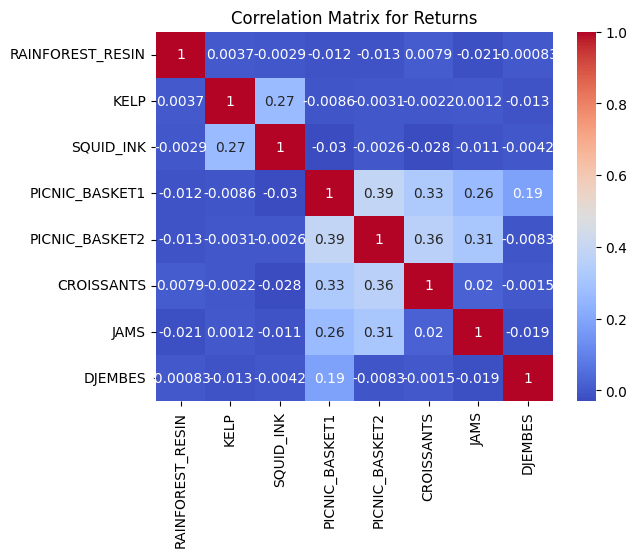

In [46]:
returns_corr_matrix = returns.corr()
sns.heatmap(returns_corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Returns")
plt.show()

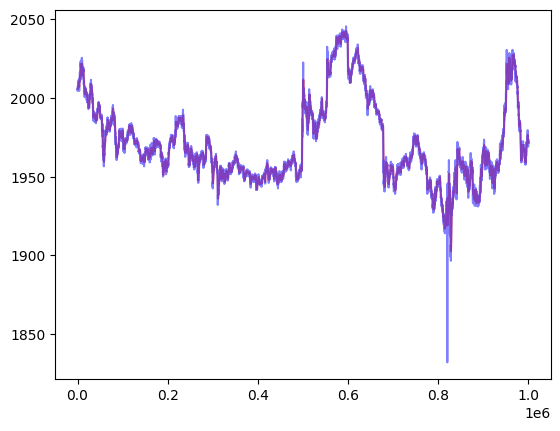

In [90]:
LOOKBACK = 10

# compute momentum: current price - price LOOKBACK steps ago
midprice_momentum = mid_prices - mid_prices.shift(LOOKBACK)

# z-score: (price - mean) / stddev
rolling_mean = mid_prices.rolling(window=LOOKBACK).mean()
rolling_std = mid_prices.rolling(window=LOOKBACK).std()
z_scores = (mid_prices - rolling_mean) / rolling_std
plt.plot(timestamps, rolling_mean['SQUID_INK'], alpha=0.5, color='r')
plt.plot(timestamps, mid_prices['SQUID_INK'], alpha=0.5, color='b')
plt.show()

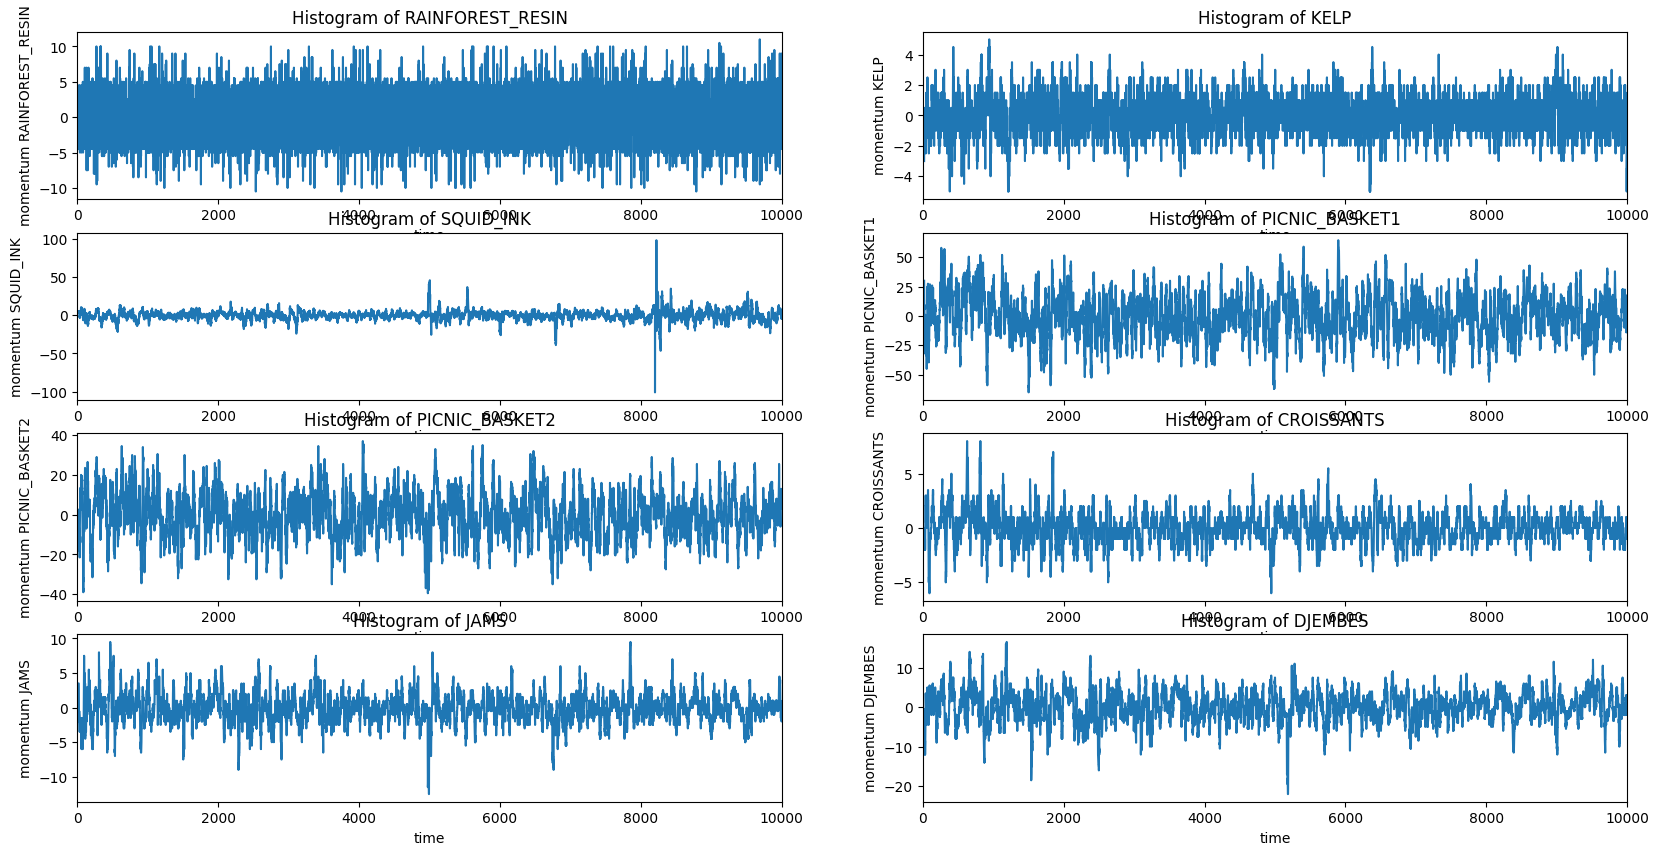

In [80]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(midprice_momentum.columns.tolist(), start=1):
    plt.subplot(4, 2, i)
    plt.plot(midprice_momentum[column].index, midprice_momentum[column].values)
    plt.xlabel("time")
    plt.ylabel(f'momentum {column}')
    plt.xlim([0, 10000])
    plt.title(f'Histogram of {column}')
plt.show()

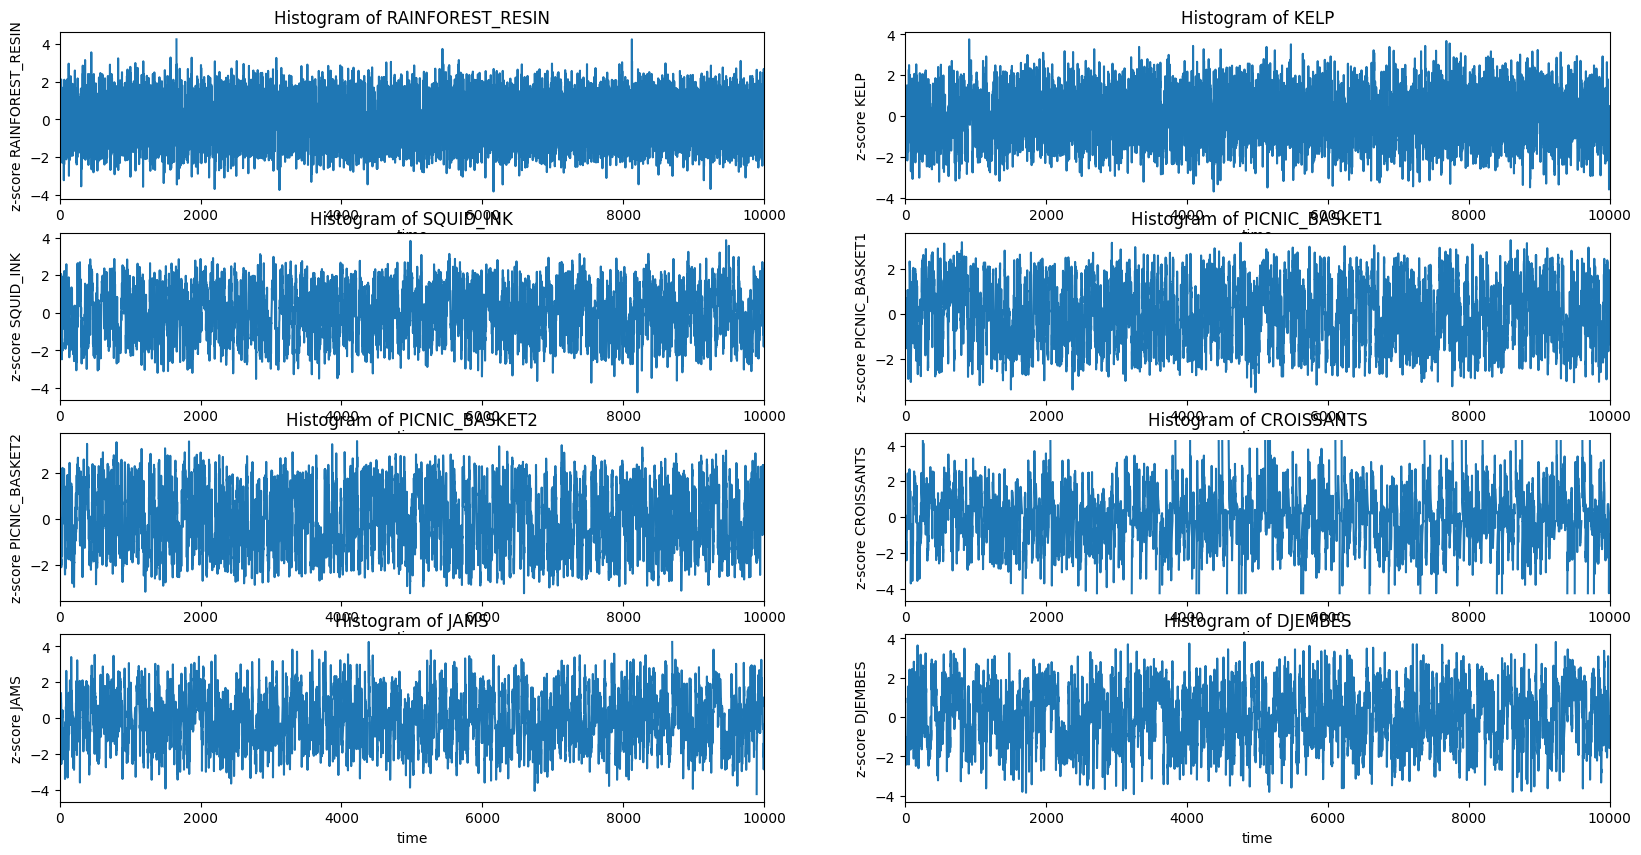

In [75]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(z_scores.columns.tolist(), start=1):
    plt.subplot(4, 2, i)
    plt.plot(z_scores[column].index, z_scores[column].values)
    plt.xlabel("time")
    plt.ylabel(f'z-score {column}')
    plt.xlim([0, 10000])
    plt.title(f'Histogram of {column}')
plt.show()

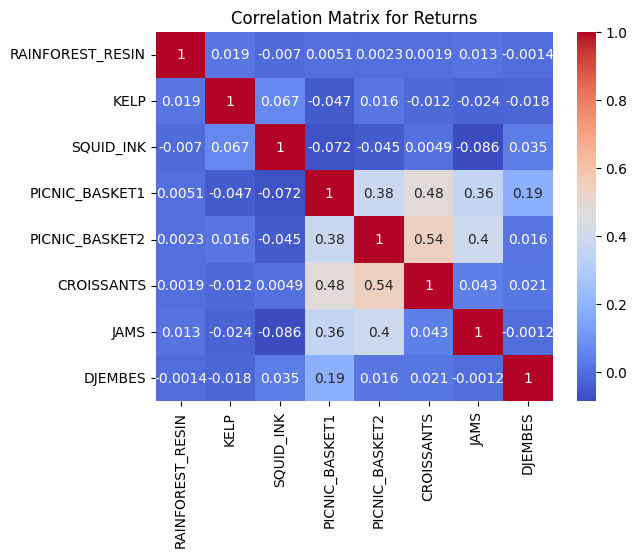

In [76]:
momentum_corr = midprice_momentum.corr()
sns.heatmap(momentum_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Returns")
plt.show()

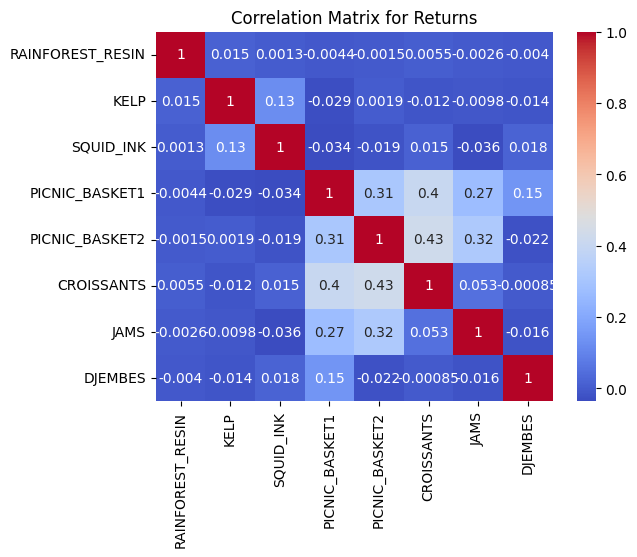

In [77]:
zscores_corr = z_scores.corr()
sns.heatmap(zscores_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Returns")
plt.show()

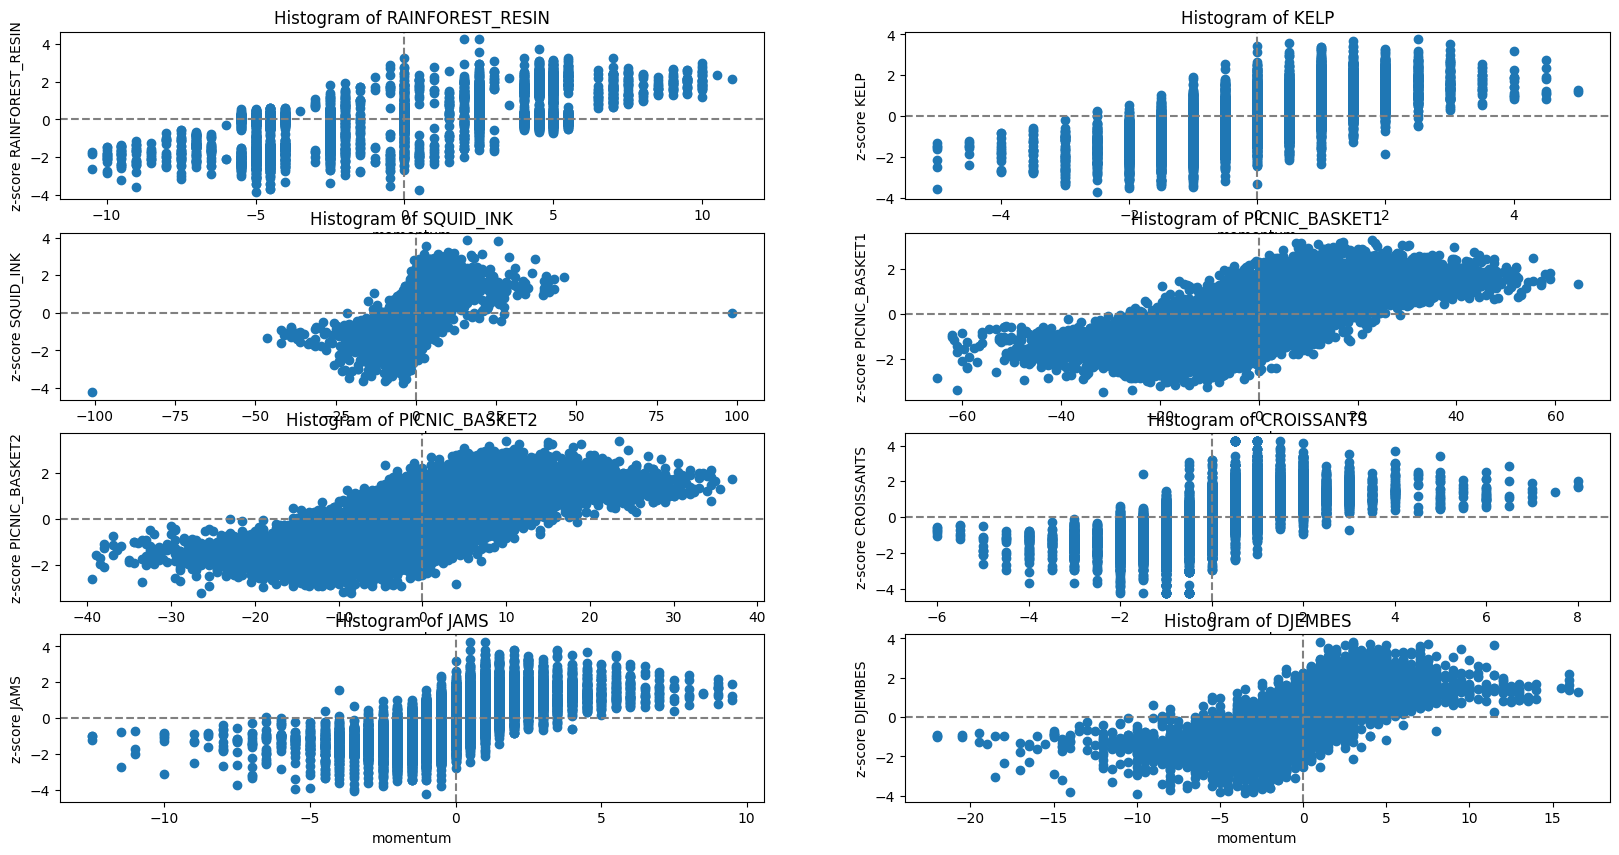

In [78]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(z_scores.columns.tolist(), start=1):
    plt.subplot(4, 2, i)
    plt.scatter(midprice_momentum[column].values, z_scores[column].values)
    plt.xlabel("momentum")
    plt.ylabel(f'z-score {column}')
    plt.title(f'Histogram of {column}')
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')
plt.show()